<a href="https://colab.research.google.com/github/Malu2203/Ted-Talks-Views-Prediction---Regression-Capstone/blob/main/Ted_Talks_Views_Prediction_Regression_Capstone_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 

*   # **PROJECT NAME : *TED TALKS VIEWS PREDICTION***
*** ***
  ##### **Project Type**    - Regression
  ##### **Contribution**    - Team
  ##### **Team Member 1 -** Soumyadip Paul 
  ##### **Team Member 2 -** Aishwarya K P
  ##### **Team Member 3 -** Akshat Raj Kumawat

*   # **PROJECT OBJECTIVE : *TO PREDICT THE VIEWS OF A VIDEO UPLOADED TO TEDx WEBSITE***









# **PROJECT SUMMARY :**


CONTRIBUTION OF EACH MEMBER FILL HERE.

# **GitHub LINK -**


*   List item
*   List item
*


# **PROBLEM DESCRIPTION/ BUSINESS CONTEXT :-**

******
* *TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages.*

* *Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life.*

* *As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore , Jimmy Wales, Shahrukh Khan, and Bill Gates.*

* *The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.*

*****

**DATA USED** : *data_ted_talks.csv* - *provided by AlmaBetter*
******

### *Even though TED talks are quite popular these days but we would still like to give a small description*
##**What is TED Talks?**

*A **TED talk** is a **public speaking** event in the form of **recorded video** presentation which was originally aired at the main TED annual event. TED refers to Technology, Entertainment, Design. TED Conferences, LLC is an American-Canadian non-profit media organization that has the main ideology of finding and sharing knowledge of the experts from different fields among the community.*

*TED was founded by Richard Saul Wurman and Harry Marks in February 1984 as a tech conference. Till date more than 13000 TED event has been held in 150 countries by TED and its sister TEDx for free consumption by all sorts of people. TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates are among the luminaries on its speaker roster.*


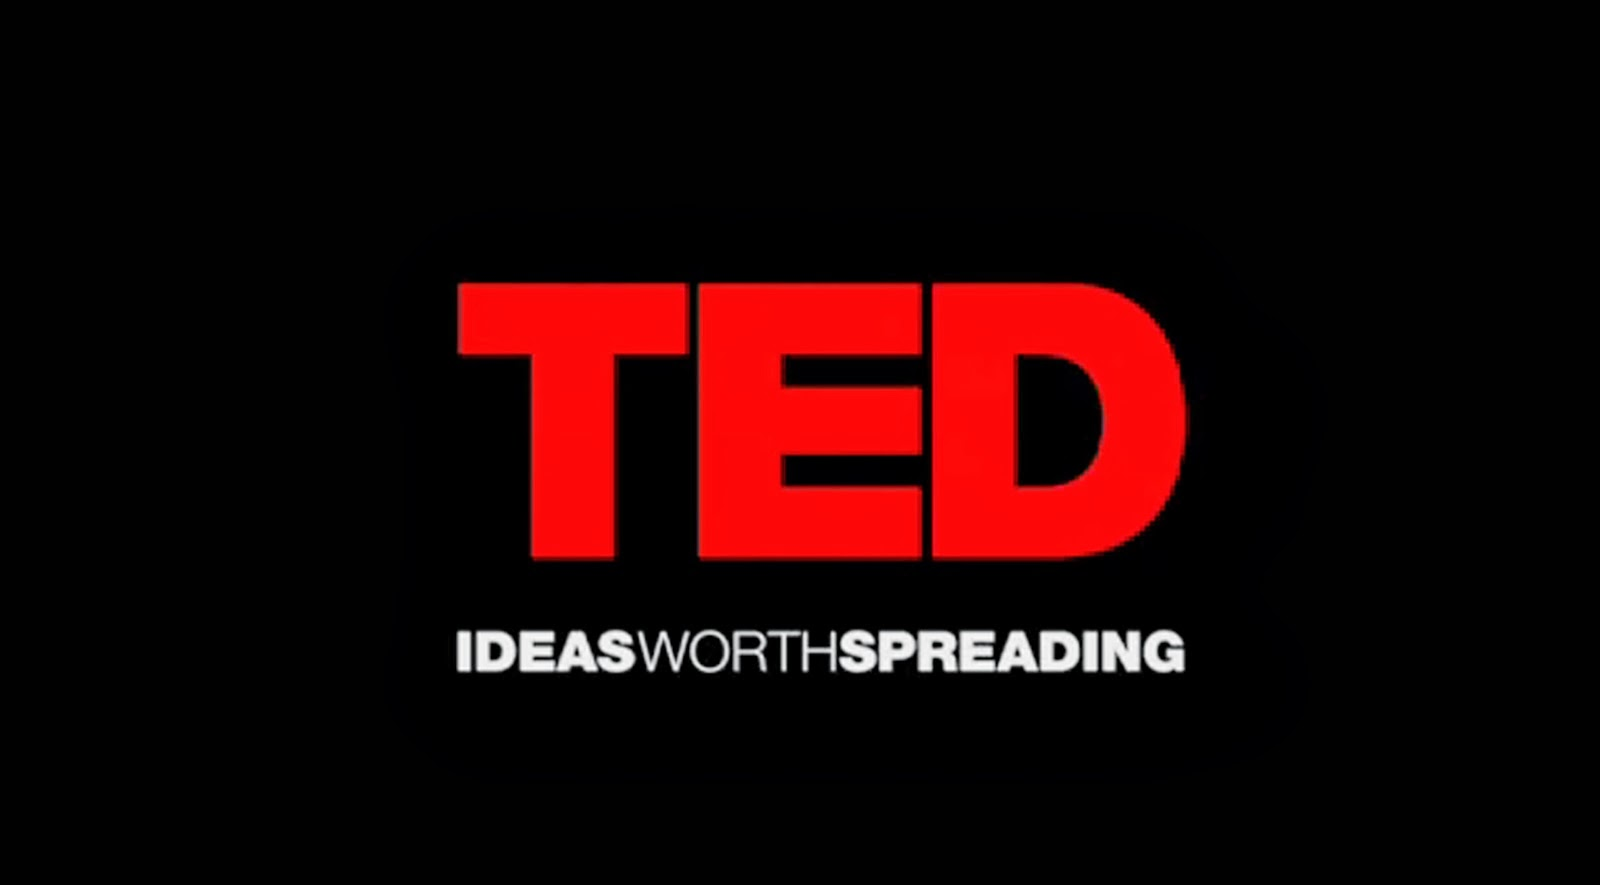


***The main goal is to create a prediction model using Supervised Regression so that it may be used to foretell how many people will watch a certain video that has been posted to TEDx website.***

##*So Let's Begin!*

## ***Project Work flow :***

* #### *Importing Libraries*
* #### *Loading the Dataset*
* #### *EDA on features*
* #### *Feature Engineering*
* #### *Data Cleaning*
* #### *Feature selection*
* #### *Fitting the regression models and HyperParameter Tuning*
* #### *Comparison of Models*
* #### *Final selection of the model*


******

# **DATA PREPARATION:**

In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
# importing data manuplation and data visualization libraries.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import ast
# importing necessary classes from sci-kit learn library for imputing null values.

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# importing WordCloud class from wordcloud class for Data Analysis.

from wordcloud import WordCloud,ImageColorGenerator

# importing required classes for model selection.

from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# importing various machine learning models.

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# importing classes of sci-kit learn for checking multicollinearity and feature selection.

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor

# importing model evaluation metrics.

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# importing warnings library to avoid unnecessary warnings.

import warnings
warnings.filterwarnings('ignore')


In [81]:
#Importing the Dataset:
tedtalk_df=pd.read_csv("/content/drive/MyDrive/AlmaBetter/MODULE4/capstone project/data_ted_talks.csv")

In [82]:
# first five Rows of dataset
tedtalk_df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [83]:
#Checking the column names:
tedtalk_df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

*The views column is the dependent variable rest of them are feature column*

*Let's see if we can understand what do these columns mean:*





***The dataset contains features like:***


*   talk_id: Talk identification number provided by TED

*    title: Title of the talk

*     speaker_1: First speaker in TED's speaker list

*    all_speakers: Speakers in the talk

*    occupations: Occupations of the speakers

*    about_speakers: Blurb about each speaker

*    recorded_date: Date the talk was recorded

*    published_date: Date the talk was published to TED.com

*    event: Event or medium in which the talk was given

*   native_lang: Language the talk was given in

*   available_lang: All available languages (lang_code) for a talk

*   comments: Count of comments

*   duration: Duration in seconds

*   topics: Related tags or topics for the talk

*   related_talks: Related talks (key='talk_id',value='title')

*   url: URL of the talk

*   description: Description of the talk

*   transcript: Full transcript of the talk

***And the target variable***

*  views : Count of views



###**Let's try to get the basic info out of Data set in an organized manner using a function:**

In [84]:
#function to get a summary of our Dataset
def DataInfoAll(df):
    print(f"Dataset Shape: {df.shape}")
    print("-"*75)
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Null/ Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Row'] = df.iloc[0].values
    summary['Second Row'] = df.iloc[1].values
    

    return summary

In [85]:
DataInfoAll(tedtalk_df)

Dataset Shape: (4005, 19)
---------------------------------------------------------------------------


,Name,dtypes,Null/ Missing,Uniques,First Row,Second Row
0,talk_id,int64,0,4005,1,92
1,title,object,0,4005,Averting the climate crisis,The best stats you've ever seen
2,speaker_1,object,0,3274,Al Gore,Hans Rosling
3,all_speakers,object,4,3306,{0: 'Al Gore'},{0: 'Hans Rosling'}
4,occupations,object,522,2049,{0: ['climate advocate']},{0: ['global health expert; data visionary']}
5,about_speakers,object,503,2977,{0: 'Nobel Laureate Al Gore focused the world’...,"{0: 'In Hans Rosling’s hands, data sings. Glob..."
6,views,int64,0,3996,3523392,14501685
7,recorded_date,object,1,1334,2006-02-25,2006-02-22
8,published_date,object,0,2962,2006-06-27,2006-06-27
9,event,object,0,459,TED2006,TED2006


**We can clearly see that there are a few missing values in**


*   *occupations*
*   *about_speakers*
*   *comments*


 **and most of the feature variables are categorical.**
******


In [86]:
#NaN values in 'comment' can be converted to 0
tedtalk_df['comments'].fillna(0, inplace = True)
#Dropping the only NaN in 'recorded_date'
tedtalk_df = tedtalk_df.dropna(subset= ['recorded_date'])
#Dropping the NaN values in all_speakers column
tedtalk_df = tedtalk_df.dropna(subset= ['all_speakers'])
#Changing the NaN values of 'occupation' column to - Not available
tedtalk_df['occupations'].fillna(str({0:' Not available'}),inplace=True,axis=0)
#Changing the NaN values of 'about_speakers' column to - Not available
tedtalk_df['about_speakers'].fillna(str({0:' Not available'}),inplace=True,axis=0)

In [87]:
tedtalk_df.isna().sum()

talk_id           0
title             0
speaker_1         0
all_speakers      0
occupations       0
about_speakers    0
views             0
recorded_date     0
published_date    0
event             0
native_lang       0
available_lang    0
comments          0
duration          0
topics            0
related_talks     0
url               0
description       0
transcript        0
dtype: int64


**We can see no that there are no NaN values left, now we can proceed to do other stuffs**
******
***Let's check for duplicate columns:***



In [88]:
tedtalk_df.duplicated().sum()

0

*There is no duplicate values, that's a good sign*

### **Categorizing Variable types:**
* data_categorical = data[['title', 'speaker_1', 'all_speakers', 'occupations', 'about_speakers', 'native_lang', 'available_lang','topics', 'related_talks', 'url', 'description', 'transcript' ]] 


* data_numerical= data[[ 'talk_id' , 'views' , 'duration' , 'comments' ]]


* data_target_variable(Y)  = data[['views']]

In [89]:
tedtalk_df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [90]:
data_numerical= tedtalk_df[['views', 'duration','comments','talk_id']]

data_categorical= tedtalk_df[['title', 'speaker_1', 'all_speakers', 'occupations', 'about_speakers', 'native_lang', 'available_lang', 'topics', 'related_talks', 'url', 'description', 'transcript']]


*Before we start with other columns let's change the dates from object to Datetime format.*

In [91]:
tedtalk_df['recorded_date'] = pd.to_datetime(tedtalk_df['recorded_date'], format = '%Y-%m-%d')
tedtalk_df['published_date'] = pd.to_datetime(tedtalk_df['published_date'], format = '%Y-%m-%d')

In [92]:
# extracting date, month, year from published date and adding to dataset
from datetime import datetime
from datetime import timedelta
import calendar

#Extracting month from published_date column
tedtalk_df['published_month'] = pd.DatetimeIndex(tedtalk_df['published_date']).month
tedtalk_df['published_month'] = tedtalk_df['published_month'].apply(lambda x: calendar.month_abbr[x])

#Extracting day from published_date column
tedtalk_df['published_day'] = pd.DatetimeIndex(tedtalk_df['published_date']).day

#Extracting year from published_date column
tedtalk_df['published_year'] = pd.DatetimeIndex(tedtalk_df['published_date']).year

#Extracting week day from published_date
tedtalk_df['dayofweek'] = tedtalk_df['published_date'].dt.day_name()

#converting day of week to day [1-mon,2-tue,3-wed,4-thr,5-fri,6-sat,0-sun]
tedtalk_df['dayofweek_num']= tedtalk_df['published_date'].apply(lambda a: a.strftime("%w")).astype('int64')

#calculating video age with respect to day by adding one day to last data value
tedtalk_df['video_age_day'] = tedtalk_df['published_date'].max() + timedelta(days=1)-(pd.DatetimeIndex(tedtalk_df['published_date']))
tedtalk_df['video_age_day'] = tedtalk_df['video_age_day'].dt.days
tedtalk_df.tail(3)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,related_talks,url,description,transcript,published_month,published_day,published_year,dayofweek,dayofweek_num,video_age_day
4002,62263,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: 'Dick M. Carpenter II'},{0: ['law researcher']},{0: 'Dick M. Carpenter II studies cutting edge...,464414,2019-06-22,2020-04-28,TEDxMileHigh,...,"{2406: 'I love being a police officer, but we ...",https://www.ted.com/talks/dick_m_carpenter_ii_...,"Many countries have an active, centuries-old l...",Picture yourself driving down the road tomorro...,Apr,28,2020,Tuesday,2,3
4003,62784,The electrifying speeches of Sojourner Truth,Daina Ramey Berry,{0: 'Daina Ramey Berry'},{0: ' Not available'},{0: ' Not available'},56582,2020-04-28,2020-04-30,TED-Ed,...,{20973: 'The breathtaking courage of Harriet T...,https://www.ted.com/talks/daina_ramey_berry_th...,Isabella Baumfree was born into slavery in lat...,"In early 1828, Sojourner Truth approached the ...",Apr,30,2020,Thursday,4,1
4004,62794,The most important anus in the ocean,Cella Wright,{0: 'Cella Wright'},{0: ' Not available'},{0: ' Not available'},0,2020-04-30,2020-04-30,TED-Ed,...,"{62347: 'The bug that poops candy', 29159: 'In...",https://www.ted.com/talks/cella_wright_the_mos...,Is it a fuzzy sock? An overripe banana? A mold...,Can you guess what you’re looking at? Is it a ...,Apr,30,2020,Thursday,4,1


In [93]:
#Creating a daily average views section
tedtalk_df['avg_daily_views'] = tedtalk_df['views'] / tedtalk_df['video_age_day']
tedtalk_df.sample(8)


,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,url,description,transcript,published_month,published_day,published_year,dayofweek,dayofweek_num,video_age_day,avg_daily_views
607,786,"In the Internet age, dance evolves ...",The LXD,{0: 'The LXD'},{0: ['dance adventurers']},{0: 'The LXD (the Legion of Extraordinary Danc...,4000539,2010-02-02,2010-03-05,TED2010,...,https://www.ted.com/talks/the_lxd_in_the_inter...,The LXD (the Legion of Extraordinary Dancers) ...,(Music) (Applause) I'm Jon M. Chu. And I'm not...,Mar,5,2010,Friday,5,3710,1078.312399
1174,1440,Music and emotion through time,Michael Tilson Thomas,{0: 'Michael Tilson Thomas'},"{0: ['musician', 'conductor']}",{0: 'Conductor Michael Tilson Thomas (call him...,1696704,2012-03-01,2012-05-07,TED2012,...,https://www.ted.com/talks/michael_tilson_thoma...,"In this epic overview, Michael Tilson Thomas t...","Well when I was asked to do this TEDTalk, I wa...",May,7,2012,Monday,1,2916,581.860082
1682,1987,Get your next eye exam on a smartphone,Andrew Bastawrous,{0: 'Andrew Bastawrous'},"{0: ['eye surgeon', 'inventor']}",{0: 'TED Fellow Andrew Bastawrous studies eye ...,1188716,2014-03-17,2014-04-30,TED2014,...,https://www.ted.com/talks/andrew_bastawrous_ge...,Thirty-nine million people in the world are bl...,There are 39 million people in the world who a...,Apr,30,2014,Wednesday,3,2193,542.050160
2749,14471,What if we ended the injustice of bail?,Robin Steinberg,{0: 'Robin Steinberg'},"{0: ['public defender', 'activist']}",{0: 'Robin Steinberg is the CEO of The Bail Pr...,2479443,2018-04-10,2018-04-12,TED2018,...,https://www.ted.com/talks/robin_steinberg_what...,"On any given night, more than 450,000 people i...",I will never forget the first time I visited a...,Apr,12,2018,Thursday,4,750,3305.924000
2131,2460,The unexpected benefit of celebrating failure,Astro Teller,{0: 'Astro Teller'},"{0: ['entrepreneur', 'inventor', 'author']}","{0: 'As ""Captain of Moonshots"" for X, Astro Te...",2703532,2016-02-15,2016-04-14,TED2016,...,https://www.ted.com/talks/astro_teller_the_une...,"""Great dreams aren't just visions,"" says Astro...","In 1962 at Rice University, JFK told the count...",Apr,14,2016,Thursday,4,1478,1829.182679
71,50,Happiness by design,Stefan Sagmeister,{0: 'Stefan Sagmeister'},{0: ['graphic designer']},"{0: 'Renowned for album covers, posters and hi...",2199376,2004-02-02,2007-04-05,TED2004,...,https://www.ted.com/talks/stefan_sagmeister_ha...,Graphic designer Stefan Sagmeister takes the a...,"About 15 years ago, I went to visit a friend i...",Apr,5,2007,Thursday,4,4775,460.602304
3331,37346,The beautiful future of solar power,Marjan van Aubel,{0: 'Marjan van Aubel'},{0: ['solar designer']},{0: 'Marjan van Aubel promotes extreme energy ...,783501,2018-12-05,2019-03-22,TEDxAmsterdamWomen,...,https://www.ted.com/talks/marjan_van_aubel_the...,The Sun delivers more energy to Earth in one h...,"Last summer, I was hiking through the Austrian...",Mar,22,2019,Friday,5,406,1929.805419
602,777,My 5 lives as an artist,Raghava KK,{0: 'Raghava KK'},{0: ['artist']},"{0: ""Raghava KK's paintings and drawings use c...",830036,2010-02-12,2010-02-26,TED2010,...,https://www.ted.com/talks/raghava_kk_my_5_live...,"With endearing honesty and vulnerability, Ragh...",I think it was in my second grade that I was c...,Feb,26,2010,Friday,5,3717,223.308044


**We can now see that the recorded_date and published_date columns are now in datetime format.**

# **EXPLORATORY DATA ANALYSIS AND VISUALIZATION** 

**Let's explore the numerical features of Ted talk dataset.**

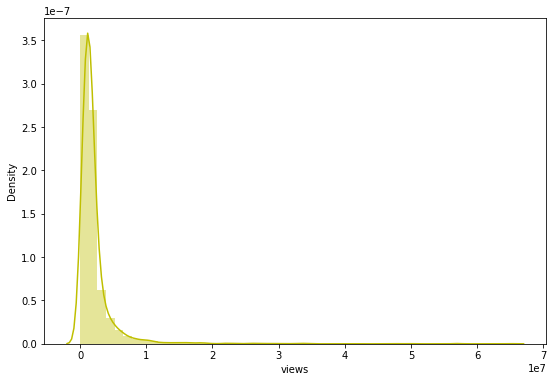

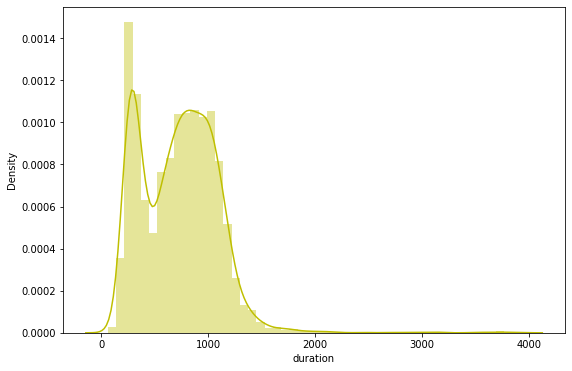

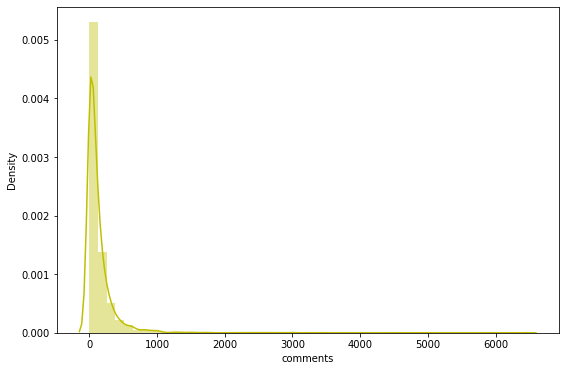

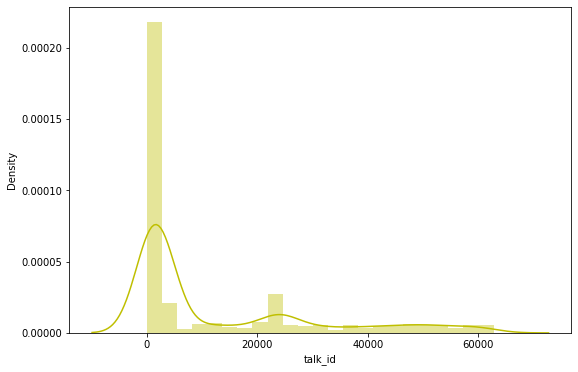

In [94]:
# Distribution of dependent or Target Variable and independent variables
for col in data_numerical[1:]:
    plt.figure(figsize=(9, 6))
    sns.distplot(tedtalk_df[col],color="y")

From the above graph it is clear that Independent and Dependent variables both are rightly skewed and they both have somewhat of a similar distributions. This might signify some linear correlation.

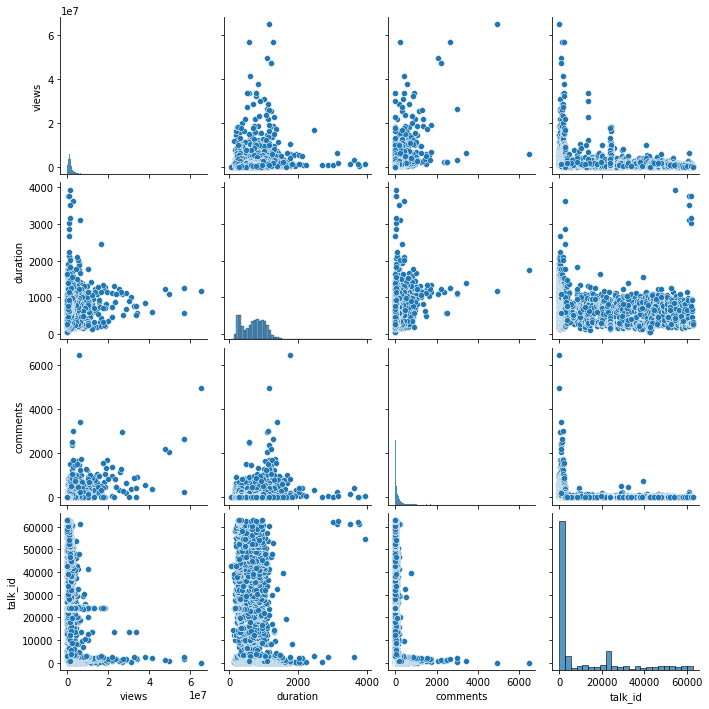

In [95]:
# Pair plot of numerical data  outliers
sns.pairplot(data_numerical)
plt.show()

**We can see that there are outliers in almost all numerical columns.**

Now, let's look at the other columns in the Data sets to see what we can learn.

**1.   Let's find the speaker with the highest views:**

In [96]:
# Extarcting the records of top 10 most viewed Speaker
df_2 = tedtalk_df.groupby('speaker_1').agg({'views':'sum'})
df_2 = df_2.sort_values(['views'],ascending = False).reset_index().head(10)
df_2 

,speaker_1,views
0,Alex Gendler,117619583
1,Sir Ken Robinson,84380518
2,James Veitch,78843641
3,Simon Sinek,62661183
4,Brené Brown,61285977
5,Bill Gates,57107176
6,Amy Cuddy,57074270
7,Julian Treasure,54799681
8,Hans Rosling,39871561
9,Tim Urban,37976820


Text(0.5, 1.0, 'Count')

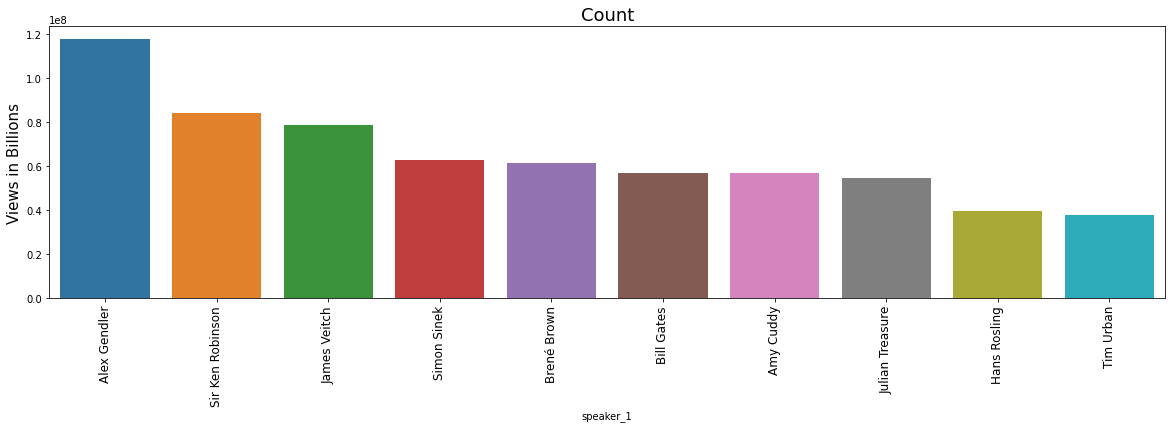

In [97]:
# Barplot of speaker vs Views
plt.subplots(figsize=(20,5))
sns.barplot(data= df_2, x='speaker_1',y= 'views')
plt.xticks(rotation = 90, fontsize=12)
plt.ylabel('Views in Billions',fontsize = 15)
plt.title('Count',fontsize = 18)

*Alex Gendler has highest views count followed by Sir Ken Robinson and james veitch*

In [98]:
# Rating the average views of the speaker_1 column
pop_speaker=tedtalk_df.groupby('speaker_1').agg({'views' : 'mean'}).sort_values(['views'],ascending=False)
pop_speaker=pop_speaker.to_dict()
pop_speaker=pop_speaker.values()
pop_speaker=  list(pop_speaker)[0]
tedtalk_df['speaker_1_avg_views']=tedtalk_df['speaker_1'].map(pop_speaker)
     

**2.   Top five video with the highest views:**

Here we first sort the values of **'views'** in ascending order and comparing it with **'title'** and **'Speaker_1'**

In [99]:
# Let's findout the most viewed title and speaker
df_1 = tedtalk_df.sort_values(['views'],ascending=False).head()
df_1[['title','speaker_1', 'views' ]] 


,title,speaker_1,views
4,Do schools kill creativity?,Sir Ken Robinson,65051954
1296,Your body language may shape who you are,Amy Cuddy,57074270
2062,This is what happens when you reply to spam email,James Veitch,56932551
646,How great leaders inspire action,Simon Sinek,49730580
796,The power of vulnerability,Brené Brown,47544833


*Sir Ken Robinson's talk on "Do Schools Kill Creativity?" is the most popular TED Talk of all time with more than 65 million views.*

*It is closely followed by Amy Cuddy talk on "Your body language may shape who you are" with more than 57 million views.*

*There is only one talk that has crossed 60 million mark while 3 talks have crossed 50 million mark.*

**3.Most popular event in TED talks**

Let's find out the Most popular Event in TED talks by comparing with Views.

In [100]:
# Comparing Event with respect to views
df_3 = tedtalk_df.groupby('event').agg({'views':'sum'})
df_3 = df_3.sort_values(['views'],ascending = False).reset_index().head(10)
df_3

,event,views
0,TED-Ed,1144872658
1,TED2015,247702961
2,TED2014,240295871
3,TEDGlobal 2013,235410234
4,TED2017,227847725
5,TED2016,227358612
6,TED2013,225967516
7,TED2012,197746106
8,TED2018,196346377
9,TED2009,191190144


Text(0.5, 1.0, 'Event')

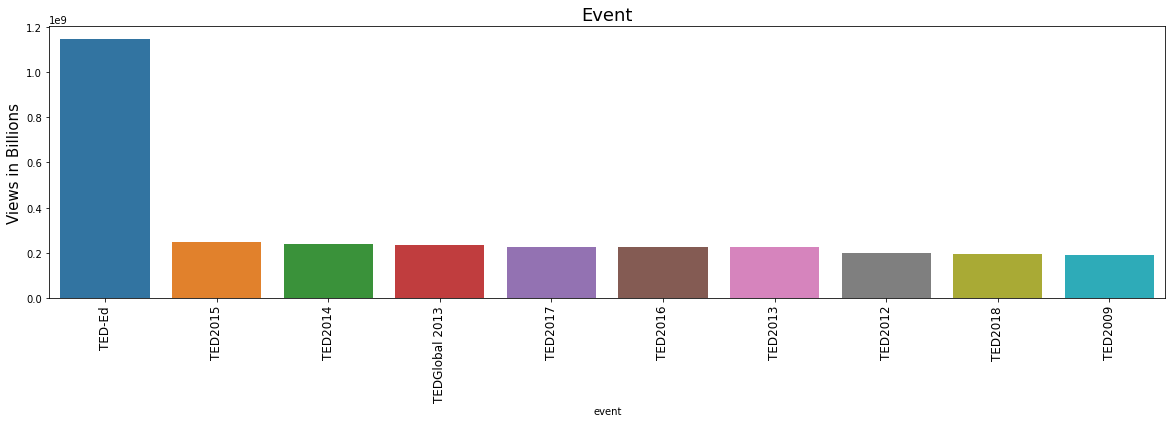

In [101]:
# Box plot between TED talk Event and Views
plt.subplots(figsize=(20,5))
sns.barplot(data= df_3, x='event',y= 'views')
plt.xticks(rotation = 90, fontsize=12)
plt.ylabel('Views in Billions',fontsize = 15)
plt.title('Event',fontsize = 18)

From above its clear that TED-Ed is the most Popular event of TED talk followed by TED2015 and TED2014.

**4. Top 15 most Frequent Speaker's occupations**

Text(0.5, 1.0, 'Count')

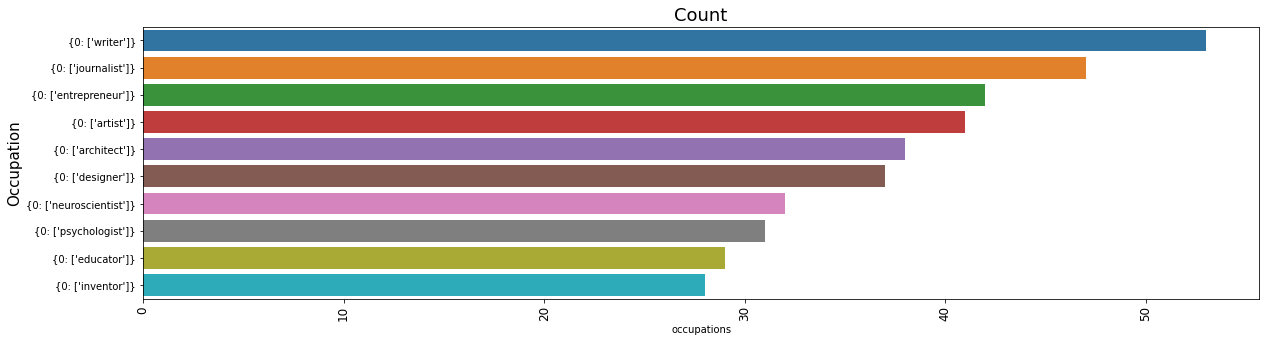

In [102]:
#Printing the top 15 most frequent speaker's occupations

plt.rcParams["figure.figsize"] = (15,4)
occ_df = tedtalk_df['occupations'].value_counts()[1:].head(10).reset_index()
# Barplot of occupations with count
plt.subplots(figsize=(20,5))
sns.barplot(x = occ_df['occupations'], y = occ_df['index'])
plt.xticks(rotation = 90, fontsize=12)
plt.ylabel('Occupation',fontsize = 15)
plt.title('Count',fontsize = 18)

The majority of the speakers work as writers, followed by journalists and entrepreneurs.

 **5.  Let's explore the title column and visualize the most frequent words in title:**

There are 156929 words in the combination of all titles.


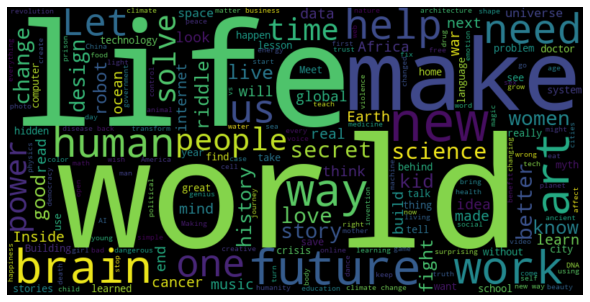

In [103]:
#importing the wordcloud
from wordcloud import WordCloud,ImageColorGenerator
     

#making of word cloud from title column
text = " ".join(topic for topic in tedtalk_df.title.astype(str))
print ("There are {} words in the combination of all titles.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud( width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (15,5)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

 **World** and **life** are the most frequently used words in titles.

 **6.  Let's visualize most popular topic tags with word cloud**

There are 403714 words in the combination of all topics.


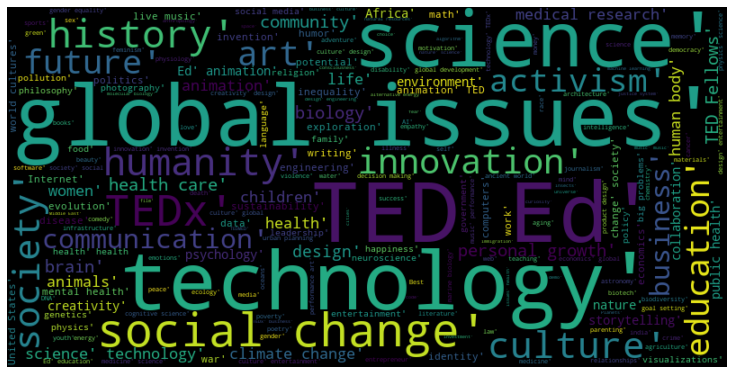

In [104]:
text = " ".join(topic for topic in tedtalk_df.topics.astype(str))
print ("There are {} words in the combination of all topics.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (15,5)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

**Golbal issues**, **Technology**, **TED Ed** and **Science** are the most popular topic tag.

**7. The frequency with which videos are uploaded throughout the year**

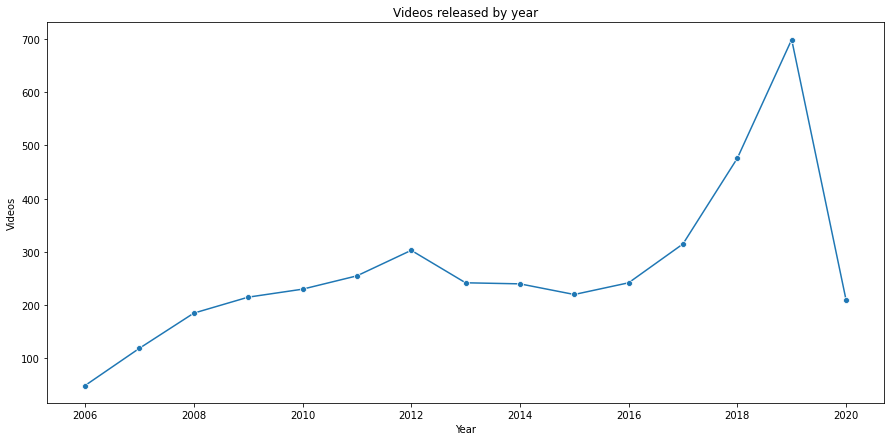

In [105]:
# Plot between videos and videos released year
plt.figure(figsize=(15,7))
sns.lineplot(data=tedtalk_df['published_year'].value_counts(),marker = 'o');
plt.xlabel('Year');
plt.ylabel('Videos');
plt.title('Videos released by year');


*  The quantity of videos were gradually increasing every year but dropped drastically in 2020 due to pandemic.
*   The majority of videos were uploaded between 2018 and 2019.




**8. Let's check during which days most videos are released and what are it's view count:**

Text(0.5, 1.0, 'Day of The Week vs No.of Videos Uploaded')

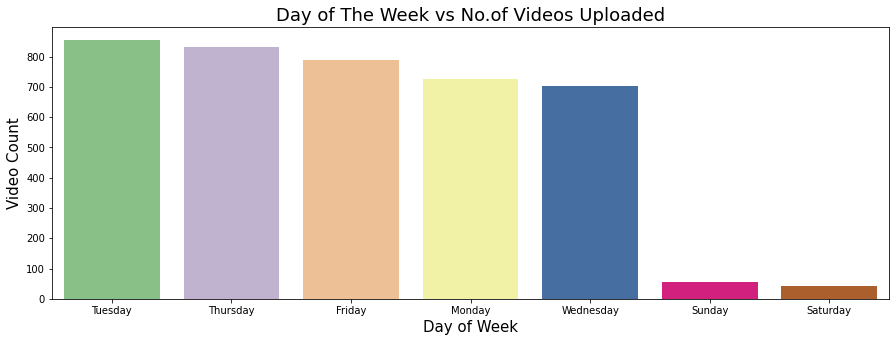

In [106]:
# 8.1 Plot between week days with video count
sns.countplot(data = tedtalk_df ,x='dayofweek',palette ='Accent',order = tedtalk_df['dayofweek'].value_counts().index)
plt.xlabel('Day of Week',fontsize = 15)
plt.ylabel('Video Count',fontsize = 15)
plt.title('Day of The Week vs No.of Videos Uploaded',fontsize = 18)


Text(0.5, 1.0, 'Day of The Week vs Views in Billions')

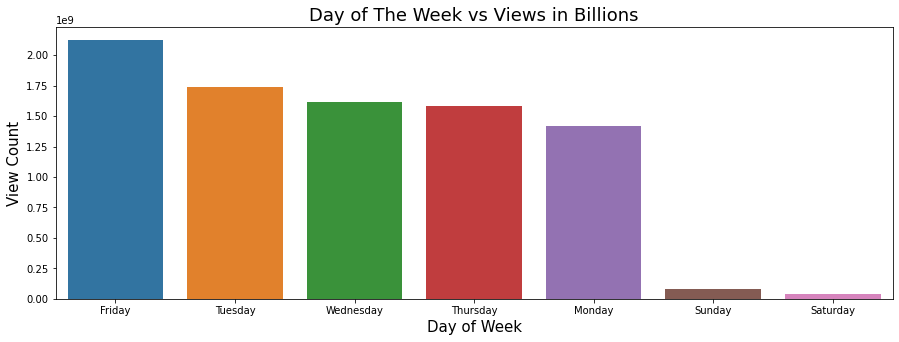

In [107]:
#8.2 Plot between week days with views
total_views = tedtalk_df.groupby('dayofweek')['views'].sum().reset_index().sort_values('views',ascending= False)
sns.barplot(x='dayofweek',y='views' ,data =total_views,order= total_views['dayofweek'].value_counts().index)
plt.xlabel('Day of Week',fontsize = 15)
plt.ylabel('View Count',fontsize = 15)
plt.title('Day of The Week vs Views in Billions',fontsize = 18)

*  *From first bar graph 8.1, we can clearly see that most of the TED talks are released in non-weekend days.*
*  *Most of the TED talks are released on Tuesday and Thursday followed by Friday.*
*  *Second graph 8.2, shows that most people watch TED talks on non-weekend days this is because of the reason that most of the TED talks are released in non-weekend days.*

*   Friday and Tuesday have the most views, followed by Wednesday.


**9.  Let's check during which month most videos are released and what are it's view count:**

Text(0.5, 1.0, 'Month vs No. of videos')

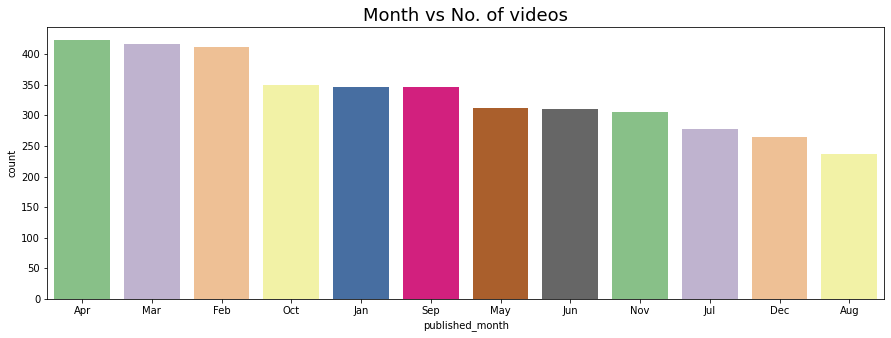

In [108]:
# 9.1 Plot between month with respect to No. of videos
sns.countplot(data = tedtalk_df , x= 'published_month', palette ='Accent',order = tedtalk_df['published_month'].value_counts().index)
plt.title('Month vs No. of videos',fontsize = 18)

In [109]:
# 9.2 Plot between Published month with Views
m_views = tedtalk_df.groupby('published_month')['views'].sum().reset_index().sort_values('views',ascending= False)

Text(0.5, 1.0, 'Month vs Views ')

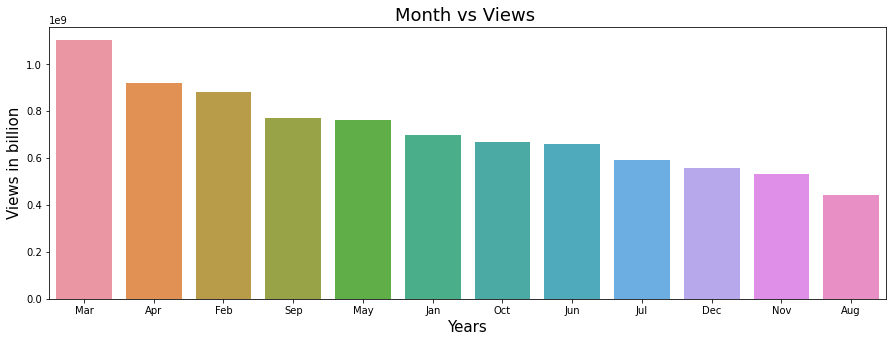

In [110]:
sns.barplot(x = 'published_month', y ='views', data= m_views,order= m_views['published_month'].value_counts().index)
plt.xlabel('Years',fontsize = 15)
plt.ylabel('Views in billion',fontsize = 15)
plt.title('Month vs Views ',fontsize = 18)

*  *From first graph 9.1, on an average the number of talks released in the month of April, March followed by February are higher.*
*  *The number of talks released in August and December are comparatively lower than other months.*
*  *From second graph 9.2, we can see that August, November and December months seems to have less views, While March and April months have most number of views.*

*****
**10.  Let's check during which year most videos are released and what are it's view count:**

Text(0.5, 1.0, 'Year vs No. of videos')

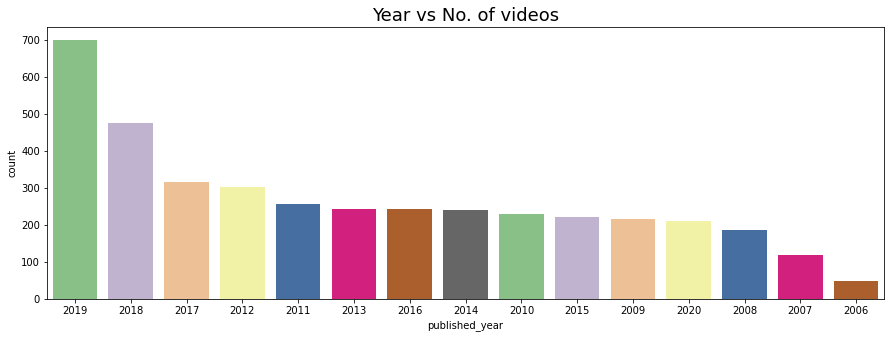

In [111]:
# 10.1 Plot between Published Year with respect to No.of videos uploaded
sns.countplot(data = tedtalk_df , x= 'published_year', palette ='Accent',order = tedtalk_df['published_year'].value_counts().index)
plt.title('Year vs No. of videos',fontsize = 18)

In [112]:
# 10.2 Plot between Published year with the views
y_views = tedtalk_df.groupby('published_year')['views'].sum().reset_index().sort_values('views',ascending= False)

Text(0.5, 1.0, 'Year vs Views ')

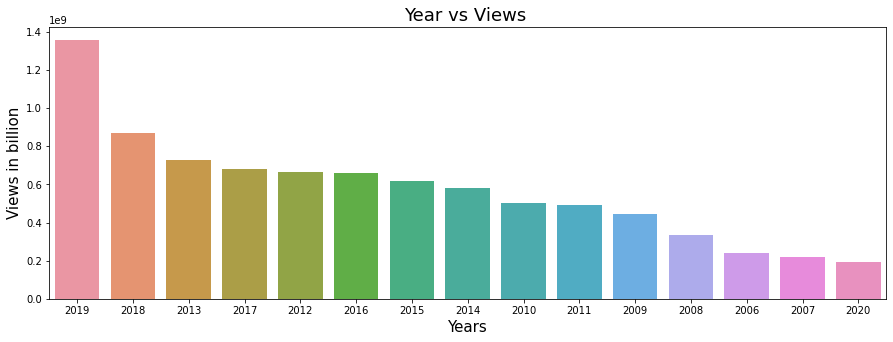

In [113]:
sns.barplot(x = 'published_year', y ='views', data= y_views, order= y_views['published_year'].value_counts().index)
plt.xlabel('Years',fontsize = 15)
plt.ylabel('Views in billion',fontsize = 15)
plt.title('Year vs Views ',fontsize = 18)

*  *According to the first bar graph 10.1, more TED talks were published in 2019 and 2018 followed by in 2012*
*  *The second bar graph 10.2 shows that there were more views in 2019 and 2018, and less views in 2006, 2007 and 2020.*

*****

*****
####**Let's remove the unnecessary columns now that we have finished visualizing the columns we believe to be necessary, and then we'll Feature the columns we do have:**

# **FEATURE SELECTION:**

In [114]:
# List of Column names
tedtalk_df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript', 'published_month',
       'published_day', 'published_year', 'dayofweek', 'dayofweek_num',
       'video_age_day', 'avg_daily_views', 'speaker_1_avg_views'],
      dtype='object')

Let's remove the columns that won't be used any longer.

In [115]:
tedtalk_df.drop( columns = ['talk_id', 'title', 'speaker_1', 'recorded_date', 'published_date','about_speakers',
                                 'event', 'url','description','transcript','native_lang','related_talks', 'available_lang', 'topics', 'all_speakers', 'occupations'], inplace = True)

In [116]:
# List of columns after dropping unwanted columns
tedtalk_df.columns

Index(['views', 'comments', 'duration', 'published_month', 'published_day',
       'published_year', 'dayofweek', 'dayofweek_num', 'video_age_day',
       'avg_daily_views', 'speaker_1_avg_views'],
      dtype='object')

Now, Let's check for **Multicollinearity** now.

**Multicollinearity** is the occurrence of high intercorrelations among two or more independent variables in a multiple regression model.

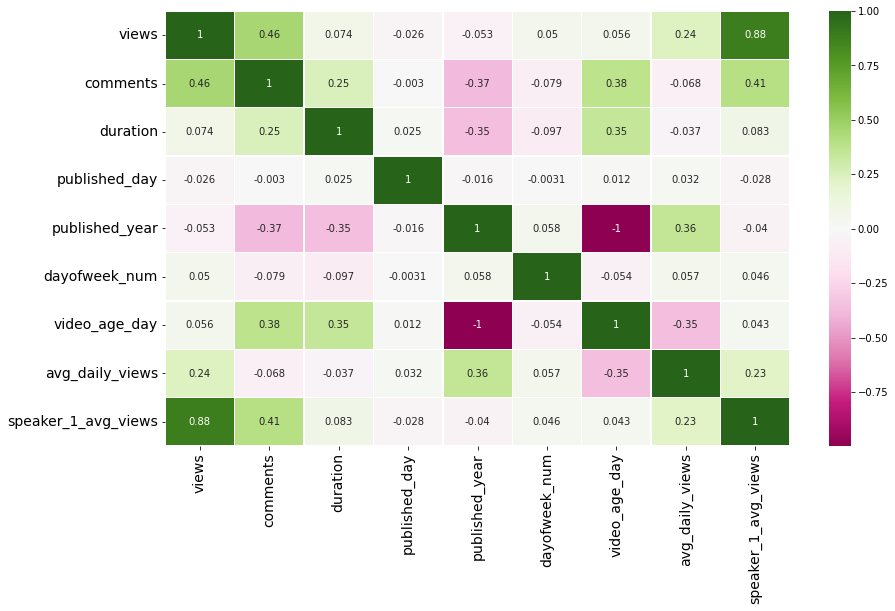

In [117]:
# Correlation graph using heatmap
plt.figure(figsize = (14,8))
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
sns.heatmap(tedtalk_df.corr(), annot=True, linewidth=.5,cmap="PiYG");

**There is not much collinearity between the features, let's use get dummies first and then we will try to check using VIF**


A variance inflation factor (**VIF**) is a measure of the amount of multicollinearity in regression analysis

**Now we will apply get_dummies on the categorical columns of this Dataset:**

In [118]:
Q1 = tedtalk_df.quantile(0.25)
Q3 = tedtalk_df.quantile(0.75)
IQR = Q3 - Q1

((tedtalk_df < (Q1 - 1.5 * IQR)) | (tedtalk_df > (Q3 + 1.5 * IQR))).sum()

avg_daily_views        493
comments               297
dayofweek                0
dayofweek_num            0
duration                21
published_day            0
published_month          0
published_year           0
speaker_1_avg_views    374
video_age_day            0
views                  393
dtype: int64

It's clear that the columns  :   'comments', 'duration', 'dayofweek_num', 'video_age_day', 'avg_daily_views', 'speaker_1_avg_views','views' have outliers let's treat it further.

In [119]:
# Replacing outliers with extreme values
for i in ['comments', 'duration', 'dayofweek_num', 'video_age_day',
       'avg_daily_views', 'speaker_1_avg_views','views']:
  Q1 = tedtalk_df[i].quantile(0.25)
  Q3 = tedtalk_df[i].quantile(0.75)
  IQR = Q3 - Q1
# condition to remove the outliers
  tedtalk_df[i]=np.where(tedtalk_df[i]<(Q1 - 1.5 * IQR),(Q1 - 1.5 * IQR),np.where(tedtalk_df[i]>(Q3 + 1.5 * IQR),(Q3 + 1.5 * IQR),tedtalk_df[i]))
     

#Let's check the outliers again
Q1 = tedtalk_df.quantile(0.25)
Q3 = tedtalk_df.quantile(0.75)
IQR = Q3 - Q1
((tedtalk_df < (Q1 - 1.5 * IQR)) | (tedtalk_df > (Q3 + 1.5 * IQR))).sum()

avg_daily_views        0
comments               0
dayofweek              0
dayofweek_num          0
duration               0
published_day          0
published_month        0
published_year         0
speaker_1_avg_views    0
video_age_day          0
views                  0
dtype: int64

In [120]:
# Let's create Y as Dependent Variable
y = tedtalk_df['views']
# Let's create X as Indepndent variables
X = tedtalk_df.drop(columns='views')

In [121]:
# List of columns in X
X.columns

Index(['comments', 'duration', 'published_month', 'published_day',
       'published_year', 'dayofweek', 'dayofweek_num', 'video_age_day',
       'avg_daily_views', 'speaker_1_avg_views'],
      dtype='object')

In [122]:
#Remove first level to get k-1 dummies out of k categorical levels.
X = pd.get_dummies(X, drop_first= True)
print(X.shape)
X.sample(5)


(4000, 25)


,comments,duration,published_day,published_year,dayofweek_num,video_age_day,avg_daily_views,speaker_1_avg_views,published_month_Aug,published_month_Dec,...,published_month_May,published_month_Nov,published_month_Oct,published_month_Sep,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday
892,306.0,446.0,11,2011,3.0,3278.0,1741.760830,4127805.125,0,0,...,1,0,0,0,0,0,0,0,0,1
1459,247.0,363.0,22,2013,3.0,2536.0,631.684937,1601953.000,0,0,...,1,0,0,0,0,0,0,0,0,1
351,94.0,1318.0,22,2008,1.0,4148.0,183.649952,761780.000,0,1,...,0,0,0,0,1,0,0,0,0,0
3576,0.0,270.0,25,2019,4.0,281.0,6367.287765,1195123.000,0,0,...,0,0,0,0,0,0,0,1,0,0
2401,243.0,898.0,22,2017,1.0,1075.0,2885.825116,3102262.000,0,0,...,1,0,0,0,1,0,0,0,0,0


**Let's find the P_value:**

P-Value is defined as the most important step to accept or reject a null hypothesis. Since it tests the null hypothesis that its coefficient turns out to be zero i.e. for a lower value of the p-value (<0.05) the null hypothesis can be rejected otherwise null hypothesis will hold. In other words, the predictor that holds a lower p-value is likely to be more meaningful addition to the model as a change in the predictor values are related to the changes of the response variable. It is one of the important steps to reject or accept the null hypothesis.

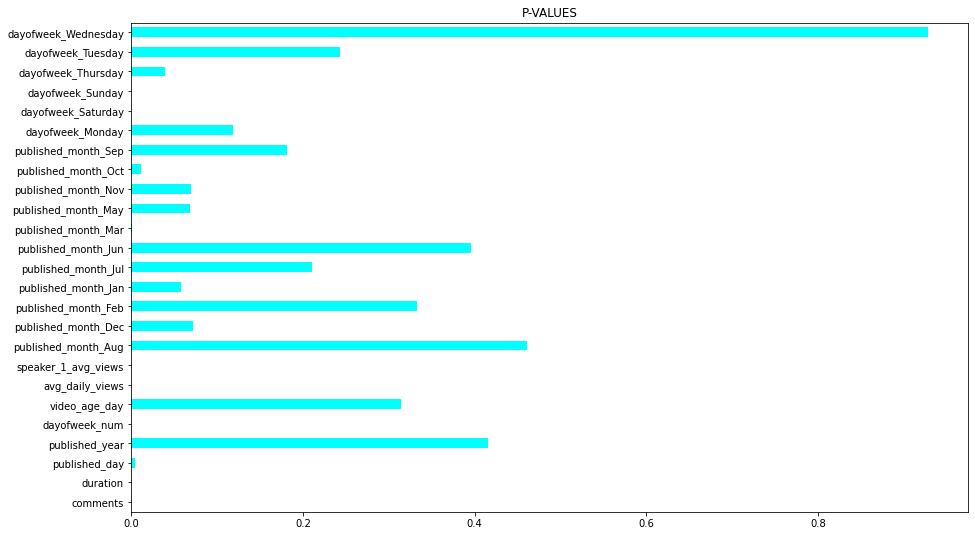

In [123]:
f_scores = f_regression(X, y)
p_values= pd.Series(f_scores[1],index= X.columns)
p_values.plot(kind='barh',color='aqua',figsize=(15,9))
plt.title('P-VALUES')
plt.show()


In [124]:
selected_features = np.where(p_values<0.005)[0]
X=X.iloc[0:,selected_features]

In [125]:
#fuction to calculate VIF in a Dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_calc(X):
    
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
    return(vif)

In [126]:
vif_calc(X)

,variables,VIF
0,comments,3.228971
1,duration,4.571812
2,published_day,3.375898
3,dayofweek_num,4.150683
4,avg_daily_views,3.001475
5,speaker_1_avg_views,5.969599
6,published_month_Mar,1.130062
7,dayofweek_Saturday,1.072461
8,dayofweek_Sunday,1.062014


**All the VIF values are below 10 so we are good to Go!**

In [127]:
X.drop(columns =['published_month_Mar','dayofweek_Sunday','dayofweek_Saturday','dayofweek_num'],inplace = True)

In [128]:
X.shape

(4000, 5)

# **MODEL IMPLEMENTATION:**

A model defines the relationship between features and label.A feature is an input variable—the x variable in simple linear regression.A label is the thing we're predicting—the y variable in simple linear regression.Training means creating or learning the model.In order to build the predictive model, it's time to implement some of the model training on the above selected feeature.
Following algorithms have been used for predictions:-

* Linear Regression
* Lasso Regression
* Ridge Regression
* Elastic Net Regression
* Decision Tree
* Random Forest Regression
* GradientBoostingRegressor
* XGB Regression

In [129]:
#train_test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 23)

### **LINEAR REGRESSION:**

In [130]:
# Fitting the model.

reg = LinearRegression().fit(X_train, y_train)

# Predicting the values for train and test data.
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

# Mean Absolute Error of Training and Testing Data.
LR_Train_MAE = mean_absolute_error(y_train, y_train_pred)
print("Train Data MAE :" , LR_Train_MAE)
LR_Test_MAE = mean_absolute_error(y_test, y_test_pred)
print("Test Data MAE :" , LR_Test_MAE)

# Mean Squared Error of Training and Testing Data.
LR_Train_MSE = mean_squared_error((y_train), (y_train_pred))
print("Train Data MSE :" , LR_Train_MSE)
LR_Test_MSE = mean_squared_error((y_test), (y_test_pred))
print("Test Data MSE :" , LR_Test_MSE)

# Root Mean Squared error of Training and Testing Data.
LR_Train_RMSE = np.sqrt(mean_squared_error((y_train), (y_train_pred)))
print("Train Data RMSE:" , LR_Train_RMSE)
LR_Test_RMSE = np.sqrt(mean_squared_error((y_test), (y_test_pred)))
print("Test Data RMSE:" , LR_Test_RMSE)

# Coefficient of determination of Training and Testing Data.
LR_Train_R2 = r2_score((y_train), (y_train_pred))
print("Train R2 :" , LR_Train_R2)
LR_Test_R2 = r2_score((y_test), (y_test_pred))
print("Test R2 :" , LR_Test_R2)

# Adjusted R2 of Training and Testing Data.
LR_Adjusted_R2 = 1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", LR_Adjusted_R2)


Train Data MAE : 267482.52255842823
Test Data MAE : 272414.03419915447
Train Data MSE : 205999297292.44666
Test Data MSE : 228431692429.026
Train Data RMSE: 453871.45459088596
Test Data RMSE: 477945.2818357202
Train R2 : 0.8331678831994357
Test R2 : 0.797622464054659
Adjusted R2 :  0.7963480463220056


### **LASSO REGULARIZATION:**

In [131]:
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,1000]}
lasso = Lasso()
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100, 1000]},
             scoring='neg_mean_squared_error')

In [132]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)
     

The best fit alpha value is found out to be : {'alpha': 55}

Using  {'alpha': 55}  the negative mean squared error is:  -207635947051.04547


In [133]:
#Fitting the model.

lasso  = Lasso(alpha=1e-13 , max_iter= 3000)
lasso.fit(X_train, y_train)

# Predicting the values for train and test data.
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

# Mean Absolute Error of Training and Testing Data.
LA_Train_MAE = mean_absolute_error(y_train, y_train_pred)
print("Train Data MAE :" , LA_Train_MAE)
LA_Test_MAE = mean_absolute_error(y_test, y_test_pred)
print("Test Data MAE :" , LA_Test_MAE)

# Mean Squared Error of Training and Testing Data.
LA_Train_MSE = mean_squared_error((y_train), (y_train_pred))
print("Train Data MSE :" , LA_Train_MSE)
LA_Test_MSE = mean_squared_error((y_test), (y_test_pred))
print("Test Data MSE :" , LA_Test_MSE)

# Root Mean Squared error of Training and Testing Data.
LA_Train_RMSE = np.sqrt(mean_squared_error((y_train), (y_train_pred)))
print("Train Data RMSE:" , LA_Train_RMSE)
LA_Test_RMSE = np.sqrt(mean_squared_error((y_test), (y_test_pred)))
print("Test Data RMSE:" , LA_Test_RMSE)

# Coefficient of determination of Training and Testing Data.
LA_Train_R2 = r2_score((y_train), (y_train_pred))
print("Train R2 :" , LA_Train_R2)
LA_Test_R2 = r2_score((y_test), (y_test_pred))
print("Test R2 :" , LA_Test_R2)

# Adjusted R2 of Training and Testing Data.
LA_Adjusted_R2 = 1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", LA_Adjusted_R2)

Train Data MAE : 267482.52255842823
Test Data MAE : 272414.03419915447
Train Data MSE : 205999297292.44666
Test Data MSE : 228431692429.026
Train Data RMSE: 453871.45459088596
Test Data RMSE: 477945.2818357202
Train R2 : 0.8331678831994357
Test R2 : 0.797622464054659
Adjusted R2 :  0.7963480463220056


### **RIDGE REGULARIZATION:**

In [134]:
RI = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,6000,7000,8000]}
R_R = GridSearchCV(RI, parameters, cv=5)
R_R.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100, 6000, 7000, 8000]})

In [135]:
print(R_R.best_params_)

{'alpha': 8000}


In [136]:
# Predicting the values for train and test data.
y_train_pred = R_R.predict(X_train)
y_test_pred = R_R.predict(X_test)

# Mean Absolute Error of Training and Testing Data.
RR_Train_MAE = mean_absolute_error(y_train, y_train_pred)
print("Train Data MAE :" , RR_Train_MAE)
RR_Test_MAE = mean_absolute_error(y_test, y_test_pred)
print("Test Data MAE :" , RR_Test_MAE)

# Mean Squared Error of Training and Testing Data.
RR_Train_MSE = mean_squared_error((y_train), (y_train_pred))
print("Train Data MSE :" , RR_Train_MSE)
RR_Test_MSE = mean_squared_error((y_test), (y_test_pred))
print("Test Data MSE :" , RR_Test_MSE)

# Root Mean Squared error of Training and Testing Data.
RR_Train_RMSE = np.sqrt(mean_squared_error((y_train), (y_train_pred)))
print("Train Data RMSE:" , RR_Train_RMSE)
RR_Test_RMSE = np.sqrt(mean_squared_error((y_test), (y_test_pred)))
print("Test Data RMSE:" , RR_Test_RMSE)

# Coefficient of determination of Training and Testing Data.
RR_Train_R2 = r2_score((y_train), (y_train_pred))
print("R2 :" , RR_Train_R2)
RR_Test_R2 = r2_score((y_test), (y_test_pred))
print("R2 :" , RR_Test_R2)

# Adjusted R2 of Training and Testing Data.
RR_Adjusted_R2 = 1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", RR_Adjusted_R2)

Train Data MAE : 267443.0194629002
Test Data MAE : 272390.3168903318
Train Data MSE : 205999538838.00958
Test Data MSE : 228428717149.6502
Train Data RMSE: 453871.7206854923
Test Data RMSE: 477942.1692523586
R2 : 0.8331676875795568
R2 : 0.7976250999835987
Adjusted R2 :  0.7963506988499941


### **ELASTIC NET REGULARIZATION:**

In [137]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error')

In [138]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 20, 'l1_ratio': 0.3}

Using  {'alpha': 20, 'l1_ratio': 0.3}  the negative mean squared error is:  -207589280357.64984


In [139]:
# Predicting the values for train and test data.
y_train_pred = elastic_regressor.predict(X_train)
y_test_pred = elastic_regressor.predict(X_test)

# Mean Absolute Error of Training and Testing Data.
ER_Train_MAE = mean_absolute_error(y_train, y_train_pred)
print("Train Data MAE :" , ER_Train_MAE)
ER_Test_MAE = mean_absolute_error(y_test, y_test_pred)
print("Test Data MAE :" , ER_Test_MAE)

# Mean Squared Error of Training and Testing Data.
ER_Train_MSE = mean_squared_error((y_train), (y_train_pred))
print("Train Data MSE :" , ER_Train_MSE)
ER_Test_MSE = mean_squared_error((y_test), (y_test_pred))
print("Test Data MSE :" , ER_Test_MSE)

# Root Mean Squared error of Training and Testing Data.
ER_Train_RMSE = np.sqrt(mean_squared_error((y_train), (y_train_pred)))
print("Train Data RMSE:" , ER_Train_RMSE)
ER_Test_RMSE = np.sqrt(mean_squared_error((y_test), (y_test_pred)))
print("Test Data RMSE:" , ER_Test_RMSE)

# Coefficient of determination of Training and Testing Data.
ER_Train_R2 = r2_score((y_train), (y_train_pred))
print("R2 :" , ER_Train_R2)
ER_Test_R2 = r2_score((y_test), (y_test_pred))
print("R2 :" , ER_Test_R2)

# Adjusted R2 of Training and Testing Data.
ER_Adjusted_R2 = 1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", ER_Adjusted_R2)


Train Data MAE : 267285.17578663345
Test Data MAE : 272292.04587008717
Train Data MSE : 206005041911.8269
Test Data MSE : 228422440051.2068
Train Data RMSE: 453877.7830119325
Test Data RMSE: 477935.6024102063
R2 : 0.8331632308194323
R2 : 0.7976306611371424
Adjusted R2 :  0.7963562950233964


### **DECISION TREE REGRESSION:**

In [140]:
param_grid = {'max_depth':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],'criterion':['mse','mae']}
CV = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid, cv=5)
CV.fit(X_train,y_train)
CV.best_params_


{'criterion': 'mse', 'max_depth': 5}

In [141]:
# Fitting the model.

DTR = DecisionTreeRegressor(criterion = 'mse', max_depth=4)
DTR.fit(X_train,y_train)

# Predicting the values for train and test data.
y_train_pred = DTR.predict(X_train)
y_test_pred = DTR.predict(X_test)

# Mean Absolute Error of Training and Testing Data.
DTR_Train_MAE = mean_absolute_error(y_train, y_train_pred)
print("Train Data MAE :" , DTR_Train_MAE)
DTR_Test_MAE = mean_absolute_error(y_test, y_test_pred)
print("Test Data MAE :" , DTR_Test_MAE)

# Mean Squared Error of Training and Testing Data.
DTR_Train_MSE = mean_squared_error((y_train), (y_train_pred))
print("Train Data MSE :" , DTR_Train_MSE)
DTR_Test_MSE = mean_squared_error((y_test), (y_test_pred))
print("Test Data MSE :" , DTR_Test_MSE)

# Root Mean Squared error of test data.
DTR_Train_RMSE = np.sqrt(mean_squared_error((y_train), (y_train_pred)))
print("Train Data RMSE:" , DTR_Train_RMSE)
DTR_Test_RMSE = np.sqrt(mean_squared_error((y_test), (y_test_pred)))
print("Test Data RMSE :" , DTR_Test_RMSE)

# Coefficient of determination of test data.
DTR_Train_R2 = r2_score((y_train), (y_train_pred))
print("R2 :" , DTR_Train_R2)
DTR_Test_R2 = r2_score((y_test), (y_test_pred))
print("Test R2 :" , DTR_Test_R2)

# Adjusted R2 of test data.
DTR_Adjusted_R2 = 1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", DTR_Adjusted_R2)

Train Data MAE : 227845.97669078247
Test Data MAE : 250621.5439826788
Train Data MSE : 163621021431.94736
Test Data MSE : 214668719642.64
Train Data RMSE: 404500.9535612337
Test Data RMSE : 463323.5582642437
R2 : 0.8674886675957453
Test R2 : 0.8098156780967822
Adjusted R2 :  0.8086180438278703


###**RANDOM FOREST REGRESSOR:**

In [142]:
RFR = RandomForestRegressor(n_estimators = 10, random_state = 23)

In [143]:
RFR.fit(X_train, y_train)
y_train_pred = RFR.predict(X_train)
y_test_pred = RFR.predict(X_test)
     

# Mean Absolute Error of Training and Testing Data.
RFR_Train_MAE = mean_absolute_error(y_train, y_train_pred)
print("Train Data MAE :" , RFR_Train_MAE)
RFR_Test_MAE = mean_absolute_error(y_test, y_test_pred)
print("Test Data MAE :" , RFR_Test_MAE)

# Mean Squared Error of Training and Testing Data.
RFR_Train_MSE = mean_squared_error((y_train), (y_train_pred))
print("Train Data MSE :" , RFR_Train_MSE)
RFR_Test_MSE = mean_squared_error((y_test), (y_test_pred))
print("Test Data MSE :" , RFR_Test_MSE)

# Root Mean Squared error of test data.
RFR_Train_RMSE = np.sqrt(mean_squared_error((y_train), (y_train_pred)))
print("Train Data RMSE:" , RFR_Train_RMSE)
RFR_Test_RMSE = np.sqrt(mean_squared_error((y_test), (y_test_pred)))
print("Test Data RMSE :" , RFR_Test_RMSE)

# Coefficient of determination of test data.
RFR_Train_R2 = r2_score((y_train), (y_train_pred))
print("R2 :" , RFR_Train_R2)
RFR_Test_R2 = r2_score((y_test), (y_test_pred))
print("R2 :" , RFR_Test_R2)

# Adjusted R2 of test data.
RFR_Adjusted_R2 = 1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", RFR_Adjusted_R2)

Train Data MAE : 72645.8492265625
Test Data MAE : 184903.63509375002
Train Data MSE : 27167832012.65841
Test Data MSE : 133645019942.60207
Train Data RMSE: 164826.6726372234
Test Data RMSE : 365574.9170041649
R2 : 0.9779976583263804
R2 : 0.8815980850128612
Adjusted R2 :  0.8808524810142017


**Hyperparameter tuning in Random forest Regressor:**

In [144]:
RFR_H = RandomForestRegressor(criterion='mae')
grid_values = {'n_estimators':[5,10,15,20,25,30,40,50], 'max_depth':[ 3, 4, 5, 6, 7, 9]}
RFR_H_grid = GridSearchCV(RFR_H, param_grid = grid_values, cv=3, n_jobs=-1)

# Fit the object to train dataset
RFR_H_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(criterion='mae'), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 9],
                         'n_estimators': [5, 10, 15, 20, 25, 30, 40, 50]})

In [145]:
RFR_H_grid_optimal_model = RFR_H_grid.best_estimator_
     

y_train_pred =  RFR_H_grid_optimal_model.predict(X_train)
y_test_pred  = RFR_H_grid_optimal_model.predict(X_test)
     

In [146]:
# Mean Absolute Error of Training and Testing Data.
RFR_Train_MAE = mean_absolute_error(y_train, y_train_pred)
print("Train Data MAE :" , RFR_Train_MAE)
RFR_Test_MAE = mean_absolute_error(y_test, y_test_pred)
print("Test Data MAE :" , RFR_Test_MAE)

# Mean Squared Error of Training and Testing Data.
RFR_Train_MSE = mean_squared_error((y_train), (y_train_pred))
print("Train Data MSE :" , RFR_Train_MSE)
RFR_Test_MSE = mean_squared_error((y_test), (y_test_pred))
print("Test Data MSE :" , RFR_Test_MSE)

# Root Mean Squared error of test data.
RFR_Train_RMSE = np.sqrt(mean_squared_error((y_train), (y_train_pred)))
print("Train Data RMSE:" , RFR_Train_RMSE)
RFR_Test_RMSE = np.sqrt(mean_squared_error((y_test), (y_test_pred)))
print("Test Data RMSE :" , RFR_Test_RMSE)

# Coefficient of determination of test data.
RFR_Train_R2 = r2_score((y_train), (y_train_pred))
print("R2 :" , RFR_Train_R2)
RFR_Test_R2 = r2_score((y_test), (y_test_pred))
print("R2 :" , RFR_Test_R2)

# Adjusted R2 of test data.
RFR_Adjusted_R2 = 1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", RFR_Adjusted_R2)

Train Data MAE : 138860.7793105469
Test Data MAE : 169953.4032671875
Train Data MSE : 135166013585.95285
Test Data MSE : 198512172065.30554
Train Data RMSE: 367649.30788178137
Test Data RMSE : 445547.04809403187
R2 : 0.8905334510242274
R2 : 0.824129463777377
Adjusted R2 :  0.8230219666978894


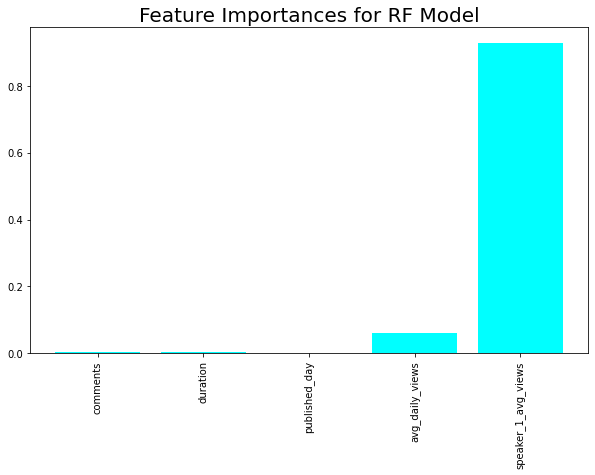

In [147]:
# getting features according to their importance in prediction

features = X_train.columns
importances = RFR_H_grid.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,6))
plt.bar(x=features, height=importances, color='aqua')
plt.title('Feature Importances for RF Model', size=20)
plt.xticks(rotation='vertical')
plt.show()
     

### **GRADIENT BOOST REGRESSOR:**

In [148]:
grid = dict()
grid['n_estimators'] = [1, 3, 5, 10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0, 100]
grid['max_depth'] = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


grid_search_gb = GridSearchCV(estimator = GradientBoostingRegressor(), param_grid=grid, n_jobs=-1, cv=5)
grid_result = grid_search_gb.fit(X_train , y_train)
print(grid_result.best_params_)


{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}


In [149]:
# Predicting the values for train and test data.
y_train_pred = grid_result.predict(X_train)
y_test_pred = grid_result.predict(X_test)

# Mean Absolute Error of Training and Testing Data.
GB_Train_MAE = mean_absolute_error(y_train, y_train_pred)
print("Train Data MAE :" , GB_Train_MAE)
GB_Test_MAE = mean_absolute_error(y_test, y_test_pred)
print("Test Data MAE :" , GB_Test_MAE)

# Mean Squared Error of Training and Testing Data.
GB_Train_MSE = mean_squared_error((y_train), (y_train_pred))
print("Train Data MSE :" , GB_Train_MSE)
GB_Test_MSE = mean_squared_error((y_test), (y_test_pred))
print("Test Data MSE :" , GB_Test_MSE)

# Root Mean Squared error of Training and Testing Data.
GB_Train_RMSE = np.sqrt(mean_squared_error((y_train), (y_train_pred)))
print("Train Data RMSE:" , GB_Train_RMSE)
GB_Test_RMSE = np.sqrt(mean_squared_error((y_test), (y_test_pred)))
print("Test Data RMSE:" , GB_Test_RMSE)

# Coefficient of determination of Training and Testing Data.
GB_Train_R2 = r2_score((y_train), (y_train_pred))
print("R2 :" , GB_Train_R2)
GB_Test_R2 = r2_score((y_test), (y_test_pred))
print("R2 :" , GB_Test_R2)

# Adjusted R2 of Training and Testing Data.
GB_Adjusted_R2 = 1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", GB_Adjusted_R2)

Train Data MAE : 124301.05686383013
Test Data MAE : 169289.0129177935
Train Data MSE : 59714205623.15535
Test Data MSE : 107444457970.53183
Train Data RMSE: 244364.9026009164
Test Data RMSE: 327787.2144708085
R2 : 0.9516394111139502
R2 : 0.9048102983266432
Adjusted R2 :  0.9042108669559041


### **XG BOOST REGRESSOR:**

In [150]:
xgb = XGBRegressor(learning_rate=0.1)
grid_values = {'n_estimators':[10, 30, 50, 80, 100], 'max_depth':[1, 3, 5, 7, 9]}
xgb_random = RandomizedSearchCV(xgb, param_distributions = grid_values, cv=3)

# Fit the object to train dataset
xgb_random.fit(X_train, y_train)

[14:50:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:50:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:50:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:50:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:50:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:50:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:50:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:50:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

RandomizedSearchCV(cv=3, estimator=XGBRegressor(),
                   param_distributions={'max_depth': [1, 3, 5, 7, 9],
                                        'n_estimators': [10, 30, 50, 80, 100]})

In [151]:
# finding the optimal model w.r.t. best_estimator_
xgb_optimal_model = xgb_random.best_estimator_
xgb_optimal_model

XGBRegressor(max_depth=5, n_estimators=80)

In [152]:
# Predicting the values for train and test data.

y_train_pred =  xgb_optimal_model.predict(X_train)
y_test_pred  = xgb_optimal_model.predict(X_test)

# Mean Absolute Error of Training and Testing Data.
XG_Train_MAE = mean_absolute_error(y_train, y_train_pred)
print("Train Data MAE :" , XG_Train_MAE)
XG_Test_MAE = mean_absolute_error(y_test, y_test_pred)
print("Test Data MAE :" , XG_Test_MAE)

# Mean Squared Error of Training and Testing Data.
XG_Train_MSE = mean_squared_error((y_train), (y_train_pred))
print("Train Data MSE :" , XG_Train_MSE)
XG_Test_MSE = mean_squared_error((y_test), (y_test_pred))
print("Test Data MSE :" , XG_Test_MSE)

# Root Mean Squared error of Training and Testing Data.
XG_Train_RMSE = np.sqrt(mean_squared_error((y_train), (y_train_pred)))
print("Train Data RMSE:" , XG_Train_RMSE)
XG_Test_RMSE = np.sqrt(mean_squared_error((y_test), (y_test_pred)))
print("Test Data RMSE:" , XG_Test_RMSE)

# Coefficient of determination of Training and Testing Data.
XG_Train_R2 = r2_score((y_train), (y_train_pred))
print("R2 :" , XG_Train_R2)
XG_Test_R2 = r2_score((y_test), (y_test_pred))
print("R2 :" , XG_Test_R2)

# Adjusted R2 of Training and Testing Data.
XG_Adjusted_R2 = 1-(1-r2_score((y_test), (y_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ", XG_Adjusted_R2)


Train Data MAE : 113216.72931457519
Test Data MAE : 170708.71204956053
Train Data MSE : 47403126319.99922
Test Data MSE : 111425785209.08762
Train Data RMSE: 217722.5902840567
Test Data RMSE: 333805.0107609046
R2 : 0.9616097529900652
R2 : 0.9012830679858649
Adjusted R2 :  0.9006614248371613


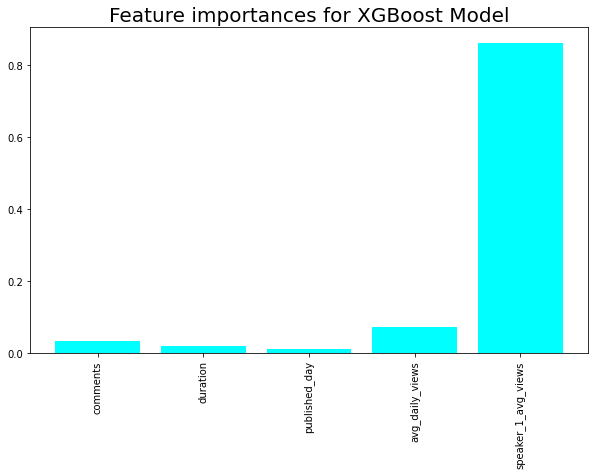

In [153]:
# getting features according to their importance in prediction
xgb_features = X_train.columns
xgb_importances = xgb_random.best_estimator_.feature_importances_
xgb_indices = np.argsort(xgb_importances)
     

plt.figure(figsize=(10,6))
plt.bar(x=xgb_features, height=xgb_importances, color='aqua')
plt.title('Feature importances for XGBoost Model', size=20)
plt.xticks(rotation='vertical')
plt.show()

**Storing all the results in a Dataframe**

In [154]:
ml_models = [{'Model Name': 'Linear Regression',
                 'Train MAE': LR_Train_MAE, 'Test MAE': LR_Test_MAE,
                 'Train MSE': LR_Train_MSE, 'Test MSE ': LR_Test_MSE,
                 'Train RMSE': LR_Train_RMSE, 'Test RMSE': LR_Test_MSE, 
                 'Train R2': LR_Train_R2, 'Test R2': LR_Test_R2,
                 'Adjusted R2': LR_Adjusted_R2},
            {'Model Name': 'Lasso Regularization',
                 'Train MAE': LA_Train_MAE, 'Test MAE': LA_Test_MAE,
                 'Train MSE': LA_Train_MSE, 'Test MSE ': LA_Test_MSE,
                 'Train RMSE': LA_Train_RMSE, 'Test RMSE': LA_Test_MSE, 
                 'Train R2': LA_Train_R2, 'Test R2': LA_Test_R2,
                 'Adjusted R2': LA_Adjusted_R2},
            {'Model Name': 'Ridge Regularization',
                 'Train MAE': RR_Train_MAE, 'Test MAE': RR_Test_MAE,
                 'Train MSE': RR_Train_MSE, 'Test MSE ': RR_Test_MSE,
                 'Train RMSE': RR_Train_RMSE, 'Test RMSE': RR_Test_MSE, 
                 'Train R2': RR_Train_R2, 'Test R2': RR_Test_R2,
                 'Adjusted R2': RR_Adjusted_R2},
            {'Model Name': 'Elastic Net Regularization',
                 'Train MAE': ER_Train_MAE, 'Test MAE': ER_Test_MAE,
                 'Train MSE': ER_Train_MSE, 'Test MSE ': ER_Test_MSE,
                 'Train RMSE': ER_Train_RMSE, 'Test RMSE': ER_Test_MSE, 
                 'Train R2': ER_Train_R2, 'Test R2': ER_Test_R2,
                 'Adjusted R2': ER_Adjusted_R2},
            {'Model Name': 'Decision Tree Regression',
                 'Train MAE': DTR_Train_MAE, 'Test MAE': DTR_Test_MAE,
                 'Train MSE': DTR_Train_MSE, 'Test MSE ': DTR_Test_MSE,
                 'Train RMSE': DTR_Train_RMSE, 'Test RMSE': DTR_Test_MSE, 
                 'Train R2': DTR_Train_R2, 'Test R2': DTR_Test_R2,
                 'Adjusted R2': DTR_Adjusted_R2},
            {'Model Name': 'Random Forest Regression',
                 'Train MAE': RFR_Train_MAE, 'Test MAE': RFR_Test_MAE,
                 'Train MSE': RFR_Train_MSE, 'Test MSE ': RFR_Test_MSE,
                 'Train RMSE': RFR_Train_RMSE, 'Test RMSE': RFR_Test_MSE, 
                 'Train R2': RFR_Train_R2, 'Test R2': RFR_Test_R2,
                 'Adjusted R2': RFR_Adjusted_R2},
            {'Model Name': 'Gradient Boost Regression',
                 'Train MAE': GB_Train_MAE, 'Test MAE': GB_Test_MAE,
                 'Train MSE': GB_Train_MSE, 'Test MSE ': GB_Test_MSE,
                 'Train RMSE': GB_Train_RMSE, 'Test RMSE': GB_Test_MSE, 
                 'Train R2': GB_Train_R2, 'Test R2': GB_Test_R2,
                 'Adjusted R2': GB_Adjusted_R2},
            {'Model Name': 'XG Boost Regression',
                 'Train MAE': XG_Train_MAE, 'Test MAE': XG_Test_MAE,
                 'Train MSE': XG_Train_MSE, 'Test MSE ': XG_Test_MSE,
                 'Train RMSE': XG_Train_RMSE, 'Test RMSE': XG_Test_MSE, 
                 'Train R2': XG_Train_R2, 'Test R2': XG_Test_R2,
                 'Adjusted R2': XG_Adjusted_R2}]

In [155]:
conclusion_df = pd.DataFrame(ml_models)

In [156]:
conclusion_df

,Model Name,Train MAE,Test MAE,Train MSE,Test MSE,Train RMSE,Test RMSE,Train R2,Test R2,Adjusted R2
0,Linear Regression,267482.522558,272414.034199,2.059993e+11,2.284317e+11,453871.454591,2.284317e+11,0.833168,0.797622,0.796348
1,Lasso Regularization,267482.522558,272414.034199,2.059993e+11,2.284317e+11,453871.454591,2.284317e+11,0.833168,0.797622,0.796348
2,Ridge Regularization,267443.019463,272390.316890,2.059995e+11,2.284287e+11,453871.720685,2.284287e+11,0.833168,0.797625,0.796351
3,Elastic Net Regularization,267285.175787,272292.045870,2.060050e+11,2.284224e+11,453877.783012,2.284224e+11,0.833163,0.797631,0.796356
4,Decision Tree Regression,227845.976691,250621.543983,1.636210e+11,2.146687e+11,404500.953561,2.146687e+11,0.867489,0.809816,0.808618
5,Random Forest Regression,138860.779311,169953.403267,1.351660e+11,1.985122e+11,367649.307882,1.985122e+11,0.890533,0.824129,0.823022
6,Gradient Boost Regression,124301.056864,169289.012918,5.971421e+10,1.074445e+11,244364.902601,1.074445e+11,0.951639,0.904810,0.904211
7,XG Boost Regression,113216.729315,170708.712050,4.740313e+10,1.114258e+11,217722.590284,1.114258e+11,0.961610,0.901283,0.900661


# **CONCLUSION:**
